The given dataset contains price of second-hand Hyundai grand i10 car with 
respect to year of making. Find the best linear relationship between year and 
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.

# 1. Perfrom Exploratory Data Analysis

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn import preprocessing

In [2]:
# Load data
data = pd.read_csv('car_age_price.csv')

###### EDA

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.shape

(112, 2)

In [5]:
data.Year.nunique()

8

In [6]:
data.Price.nunique()

35

In [7]:
data['Year'].value_counts()

2017    47
2015    22
2019    12
2018    11
2016     6
2014     6
2020     4
2013     4
Name: Year, dtype: int64

In [8]:
data['Price'].value_counts()

550000    20
520000    11
500000    10
450000     6
490000     5
400000     5
600000     4
465000     4
300000     4
425000     3
350000     3
390000     3
525000     3
325000     3
375000     2
475000     2
575000     2
345000     2
320000     2
700000     2
540000     2
640000     1
480000     1
409999     1
396000     1
495000     1
595000     1
341000     1
755000     1
545000     1
486000     1
650000     1
434999     1
509999     1
420000     1
Name: Price, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [10]:
# Find Null values
data.isna().sum()

Year     0
Price    0
dtype: int64

In [11]:
# Basic Statistical Computations
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [12]:
data.median()

Year       2017.0
Price    500000.0
dtype: float64

<AxesSubplot: >

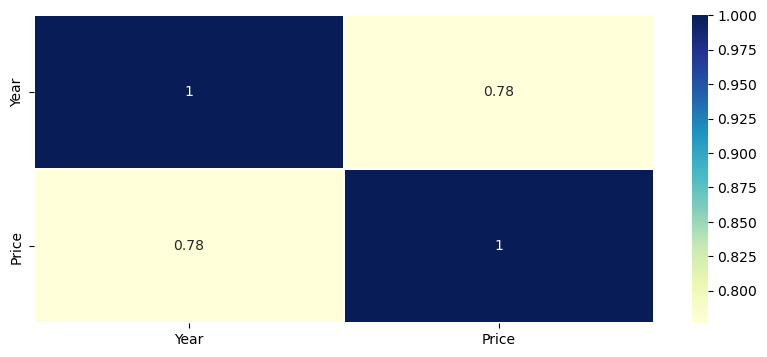

In [13]:
# Correlation between Year and Price
%matplotlib inline
corrmatrix = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix, annot=True, linewidth=0.3,cmap='YlGnBu')

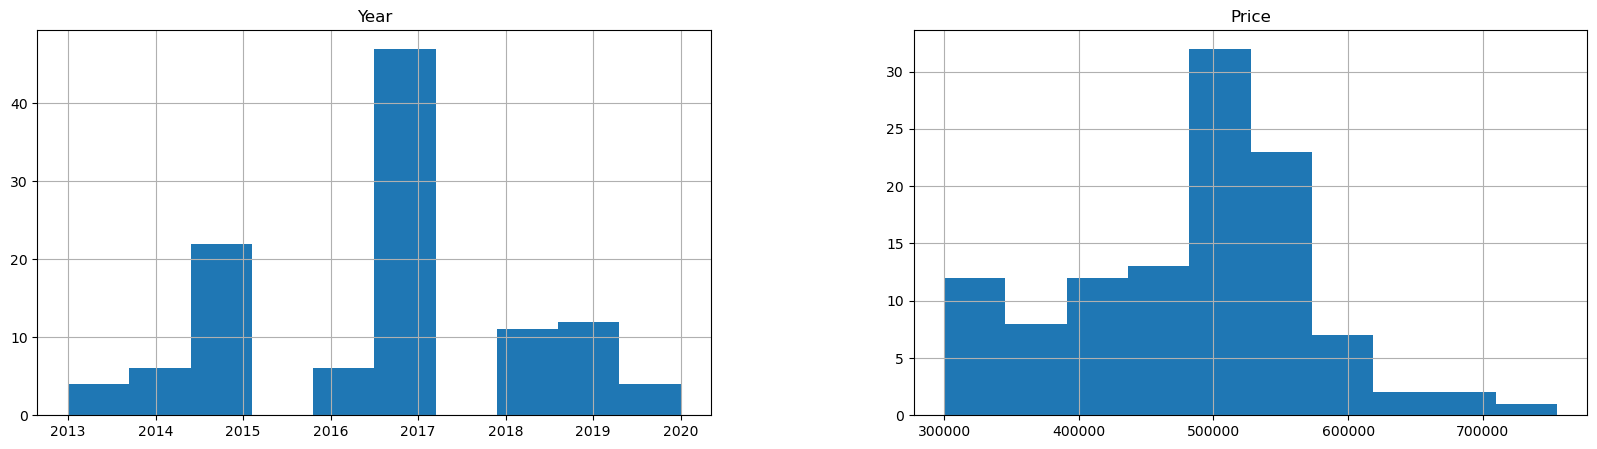

In [14]:
# Plot histogram to see if the data is normally distributed
freqgraph = data.select_dtypes(include=['int64'])
freqgraph.hist(figsize=(20,5))
plt.show()

### 1 (b). Removing Outliers

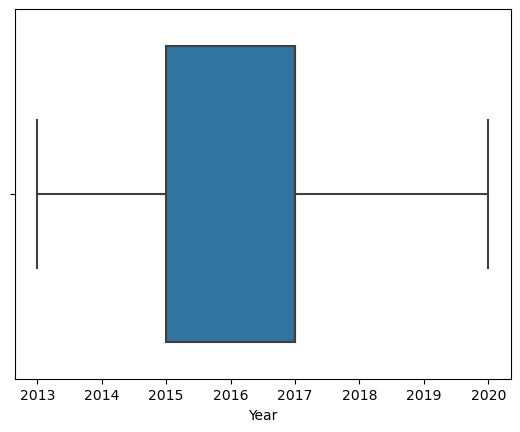

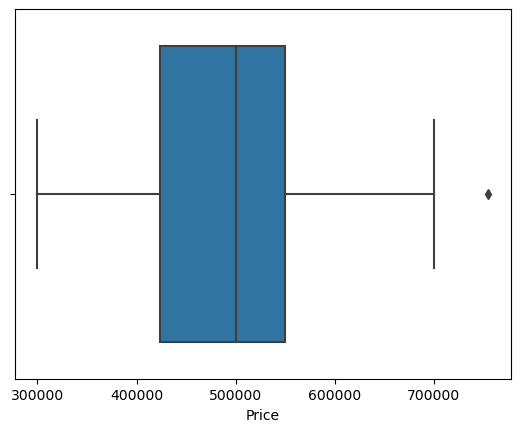

In [15]:
# Visualize outliers using box plot
%matplotlib inline
for i in data:
    sns.boxplot(x=data[i])
    plt.show()

#### Removing outlier in 'Price' column

In [16]:
IQR = stats.iqr(data.Price,interpolation='midpoint')
IQR

127500.0

In [17]:
Q1=data.Price.quantile(0.25)
Q3=data.Price.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(232500.0, 741250.0)

In [18]:
data.loc[data.Price>max_limit]

,Year,Price
1,2019,755000


In [19]:
data.loc[data.Price<min_limit]

,Year,Price


In [20]:
# Replace outlier with median since it's a skewed data
data.loc[data['Price']>max_limit,'Price']=np.median(data['Price'])

In [21]:
data.loc[data.Price>max_limit]

,Year,Price


# 2. Linear Relationship between Year and Price

In [22]:
# Set x and y for regression
y = data['Price']
x = data.drop(['Price'],axis=1)

#### Adding a linear line trend

<AxesSubplot: xlabel='Year', ylabel='Price'>

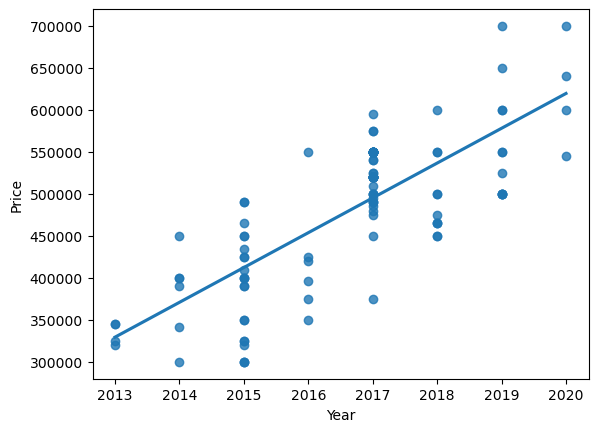

In [23]:
%matplotlib inline
sns.regplot(x=x,y=y,data=data,ci=None)

In [24]:
# splitting X and y into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

# 2 (a) Create linear regression model

In [25]:
# create linear regression model and fit
lr = linear_model.LinearRegression()
model_lr = lr.fit(x_train,y_train)
y_pred_lr = model_lr.predict(x_test)
print('Slope: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Slope:  [44728.93625104]
Intercept:  -89716832.67100333


### i. Error of predictive model

In [26]:
mse_lr = mean_squared_error(y_test,y_pred_lr)
mae_lr = mean_absolute_error(y_test,y_pred_lr)
r2_lr = r2_score(y_test,y_pred_lr)                         
print('Mean Squared Error is : ',mse_lr)
print('Mean Absolute Error is : ',mae_lr)
print('R squared is : ',r2_lr)
print('Root Mean Squared Error is : ', np.sqrt(mse_lr))

Mean Squared Error is :  3881491312.3659024
Mean Absolute Error is :  50457.92844504571
R squared is :  0.4326935668227986
Root Mean Squared Error is :  62301.61564811865


### ii. Plotting Actual vs Predictive Price

Text(0.5, 1.0, 'Actual Vs Predicted price')

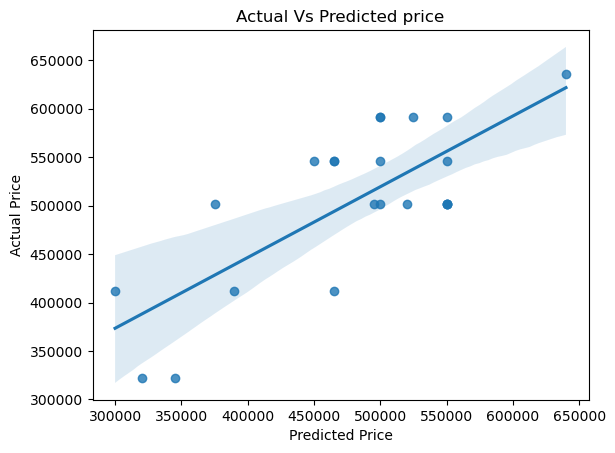

In [27]:
%matplotlib inline
sns.regplot(x=y_test, y=y_pred_lr)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual Vs Predicted price')

### iii. Predict the possible price of a 2022 model second-hand grand i10 -- Using linear regression

In [28]:
x_2022 = pd.DataFrame([2022])
y_lr = model_lr.predict(x_2022)
y_lr

C:\Users\sobhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([725076.42860116])

# 2 (b) Create lasso regression model

In [29]:
# Create lasso regression model and fit
lasso = Lasso(alpha = 1)
model_lasso = lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
lasso.fit(x_train, y_train)

Lasso(alpha=1)

### i. Error of predictive model

In [30]:
mse_lasso = mean_squared_error(y_test,y_pred_lasso)
mae_lasso = mean_absolute_error(y_test,y_pred_lasso)
r2_lasso = r2_score(y_test,y_pred_lasso)
print('Mean Squared Error is : ',mse_lasso)
print('Mean Absolute Error is : ',mae_lasso)
print('R squared is : ',r2_lasso)
print('Root Mean Squared Error is : ', np.sqrt(mse_lasso))

Mean Squared Error is :  3881454341.953046
Mean Absolute Error is :  50457.78164482505
R squared is :  0.43269897030083393
Root Mean Squared Error is :  62301.31894232293


### ii. Plotting Actual vs Predictive Price

Text(0.5, 1.0, 'Actual Vs Predicted price')

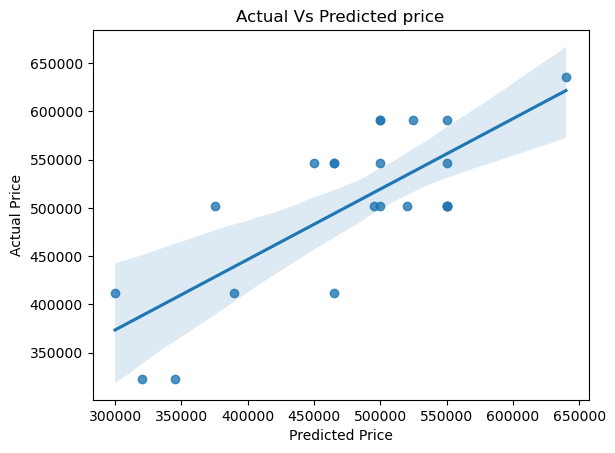

In [31]:
%matplotlib inline
sns.regplot(x=y_test, y=y_pred_lasso)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual Vs Predicted price')

### iii. Predict the possible price of a 2022 model second-hand grand i10 -- Using lasso regression

In [32]:
row = [2022]
y_lasso = lasso.predict([row])
print('Predicted: ',y_lasso)

Predicted:  [725074.18692756]


C:\Users\sobhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


### iv. Find best model

In [33]:
# Best model being the one with least MSE
if mse_lr < mse_lasso:
    print('MSE is lowest for Linear Regression: ', mse_lr, ' and hence Linear Regression is the best model for this data set')
else:
    print('MSE is lowest for Lasso Regression: ', mse_lasso, ' and hence Lasso Regression is the best model for this data set')

MSE is lowest for Lasso Regression:  3881454341.953046  and hence Lasso Regression is the best model for this data set


# 3. Normalization

In [34]:
# Normalize data since Year doesn't follow normal distribution
df = preprocessing.normalize(data)
norm_data = pd.DataFrame(df, columns=data.columns)
norm_data

,Year,Price
0,0.004340,0.999991
1,0.004038,0.999992
2,0.002884,0.999996
3,0.004340,0.999991
4,0.004340,0.999991
...,...,...
107,0.005376,0.999986
108,0.006713,0.999977
109,0.004741,0.999989
110,0.004800,0.999988


#### Plots of original year column and normalized year column

C:\Users\sobhi\AppData\Local\Temp\ipykernel_24940\1092428889.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Year, ax=ax[0])
C:\Users\sobhi\AppData\Local\Temp\ipykernel_24940\1092428889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(norm_data.Year, ax=ax[1])


Text(0.5, 1.0, 'Normalized data')

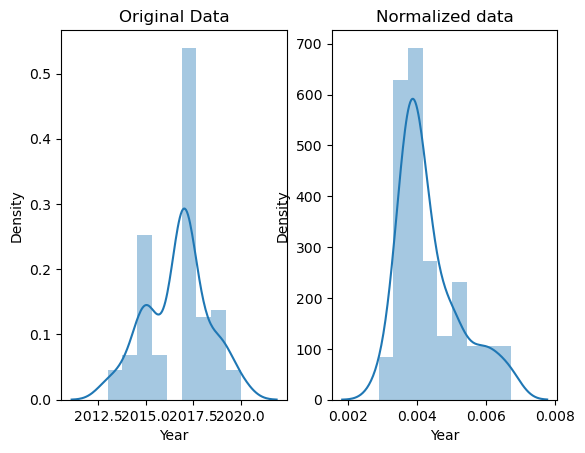

In [35]:
%matplotlib inline
fig, ax=plt.subplots(1,2)
sns.distplot(data.Year, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(norm_data.Year, ax=ax[1])
ax[1].set_title("Normalized data")

In [36]:
# Set x and y for regression
y = data['Price']
x_norm = norm_data.drop(['Price'],axis=1)

In [37]:
# splitting X and y into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x_norm,y,test_size=.2,random_state=42)

### 4 (a). Linear regression of normalized data

In [38]:
# Create Linear regression model and fit
lr = linear_model.LinearRegression()
model_norm_lr = lr.fit(x_train,y_train)
y_pred_norm_lr = model_norm_lr.predict(x_test)

##### i. Error of predictive model

In [39]:
mse_norm_lr = mean_squared_error(y_test,y_pred_norm_lr)
mae_norm_lr = mean_absolute_error(y_test,y_pred_norm_lr)
r2_norm_lr = r2_score(y_test,y_pred_norm_lr)                         
print('Mean Squared Error is : ',mse_norm_lr)
print('Mean Absolute Error is : ',mae_norm_lr)
print('R squared is : ',r2_norm_lr)

Mean Squared Error is :  303049510.7602134
Mean Absolute Error is :  13109.901782215888
R squared is :  0.9557072467281448


Text(0.5, 1.0, 'Actual Vs Predicted price')

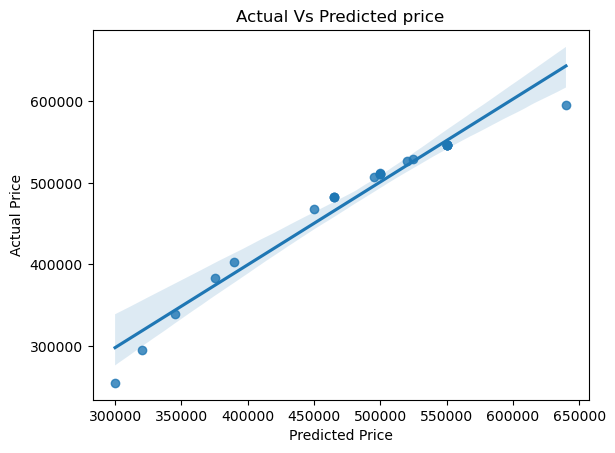

In [40]:
sns.regplot(x=y_test, y=y_pred_norm_lr)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual Vs Predicted price')

### Lasso regression of normalized data

In [41]:
# Create lasso regression model and fit
n_lasso = Lasso(alpha = 1)
model1 = n_lasso.fit(x_train, y_train)
y_pred_norm_lasso = n_lasso.predict(x_test)
lasso.fit(x_train, y_train)

Lasso(alpha=1)

##### Error of predictive model

In [42]:
mse_norm_lasso = mean_squared_error(y_test,y_pred_norm_lasso)
mae_norm_lasso = mean_absolute_error(y_test,y_pred_norm_lasso)
r2_norm_lasso = r2_score(y_test,y_pred_norm_lasso)
print('Mean Squared Error is : ',mse_norm_lasso)
print('Mean Absolute Error is : ',mae_norm_lasso)
print('R squared is : ',r2_norm_lasso)

Mean Squared Error is :  293447690.2456416
Mean Absolute Error is :  13052.854784381192
R squared is :  0.9571106182958655


Text(0.5, 1.0, 'Actual Vs Predicted price')

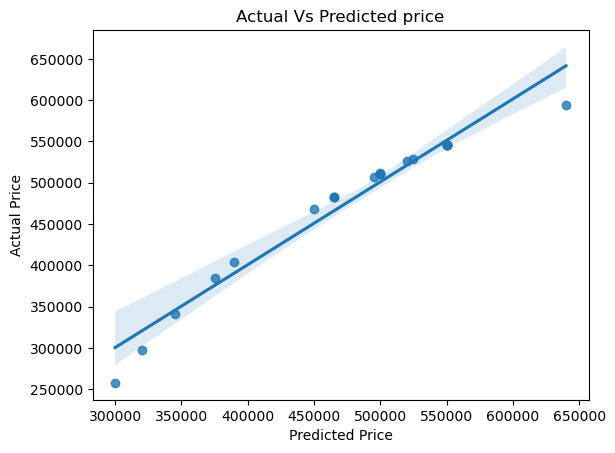

In [43]:
sns.regplot(x=y_test, y=y_pred_norm_lasso)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual Vs Predicted price')

# 4. Best Model

Lasso regression of normalized data is the best model since it is having least MSE value, and highest R squared value which is closer to 1

In [44]:
# Find best model considering MSE
mse = np.array([mse_lr, mse_lasso, mse_norm_lr, mse_norm_lasso])
min_mse = mse.min()
print('Least MSE is : ',min_mse)
if mse_lr == min_mse:
    print('Simple linear regression is the best model for this data set')
elif mse_lasso == min_mse:
    print('Simple lasso regression is the best model for this data set')
elif mse_norm_lr == min_mse:
    print('Linear regression on normalized data is the best model for this data set')
elif mse_norm_lasso == min_mse:
    print('Lasso regression on normalized data is the best model for this data set')
else:
    print('exception')

Least MSE is :  293447690.2456416
Lasso regression on normalized data is the best model for this data set


In [45]:
# Find best model considering R square
r2 = np.array([r2_lr, r2_lasso, r2_norm_lr, r2_norm_lasso])
max_r = r2.max()
print('Highest R squared is : ', max_r)
if r2_lr == max_r:
    print('Simple linear regression is the best model for this data set')
elif r2_lasso == max_r:
    print('Simple lasso regression is the best model for this data set')
elif r2_norm_lr == max_r:
    print('Linear regression on normalized data is the best model for this data set')
elif r2_norm_lasso == max_r:
    print('Lasso regression on normalized data is the best model for this data set')
else:
    print('exception')

Highest R squared is :  0.9571106182958655
Lasso regression on normalized data is the best model for this data set
